<a href="https://colab.research.google.com/github/Sidhtang/learnings-from-hands-on-machine-learning-book/blob/main/Learning_about_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
assert sklearn.__version__ >= "0.20"
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"


In [2]:
#PCA wiht a linear
#building a #3d dataset

In [3]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [4]:
np.random.seed(42)
tf.random.set_seed(42)
encoder=keras.models.Sequential([
    keras.layers.Dense(2,input_shape=[3])
])
decoder=keras.models.Sequential([
    keras.layers.Dense(3,input_shape=[2])
])
autoencoder=keras.models.Sequential([encoder,decoder])
autoencoder.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [5]:
history=autoencoder.fit(X_train,X_train,epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 14ms/step - loss: 1.0768
Epoch 2/20
2/2 [==============================] - 0s 12ms/step - loss: 0.1760
Epoch 3/20
2/2 [==============================] - 0s 14ms/step - loss: 0.0729
Epoch 4/20
2/2 [==============================] - 0s 15ms/step - loss: 0.1830
Epoch 5/20
2/2 [==============================] - 0s 11ms/step - loss: 0.4171
Epoch 6/20
2/2 [==============================] - 0s 8ms/step - loss: 0.0803
Epoch 7/20
2/2 [==============================] - 0s 13ms/step - loss: 0.0163
Epoch 8/20
2/2 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 9/20
2/2 [==============================] - 0s 12ms/step - loss: 0.0073
Epoch 10/20
2/2 [==============================] - 0s 15ms/step - loss: 0.0050
Epoch 11/20
2/2 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 12/20
2/2 [==============================] - 0s 27ms/step - loss: 0.0046
Epoch 13/20
2/2 [==============================] - 0s 19ms/step

In [6]:
codings=encoder.predict(X_train)

2/2 [==============================] - 0s 7ms/step


NameError: name 'save_fig' is not defined

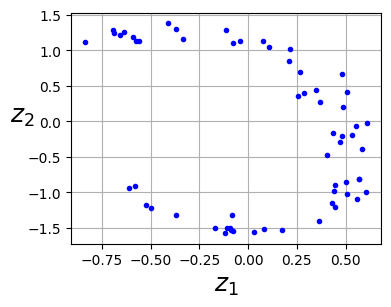

In [7]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()


In [ ]:
 #stacked autoencoder

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [10]:

tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))


Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3359 - rounded_accuracy: 0.8890 - val_loss: 0.3138 - val_rounded_accuracy: 0.9053
Epoch 2/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3049 - rounded_accuracy: 0.9158 - val_loss: 0.3036 - val_rounded_accuracy: 0.9202
Epoch 3/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2985 - rounded_accuracy: 0.9217 - val_loss: 0.3021 - val_rounded_accuracy: 0.9124
Epoch 4/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2949 - rounded_accuracy: 0.9249 - val_loss: 0.2942 - val_rounded_accuracy: 0.9273
Epoch 5/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2923 - rounded_accuracy: 0.9270 - val_loss: 0.2923 - val_rounded_accuracy: 0.9276
Epoch 6/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2904 - rounded_accuracy: 0.9287 - val_loss: 0.2909 - val_rounded_accuracy: 0.9308
Epoch 7/20
1719/1719 [==========

In [11]:
import matplotlib.pyplot as plt

def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary") # Use plt.imshow to display the image
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary") # Use plt.imshow to display the image
        plt.axis("off")
    plt.show() # Display the plot

1/1 [==============================] - 0s 81ms/step


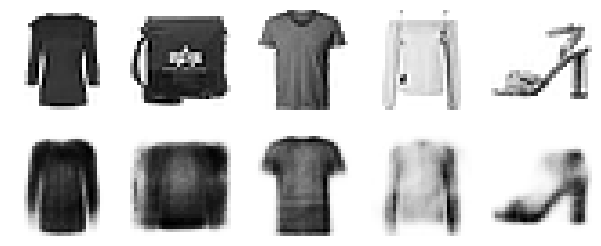

NameError: name 'save_fig' is not defined

In [12]:

show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

In [ ]:
#training a deep convolutional gan

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [14]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [15]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [16]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)